# Data exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


## Processing the data
Here data is loaded from CSV and then using self-hosted Nominatim instance, to calculate the distance between the location of apartment and city center of Wroclaw.

You need to have docker installed to launch the Nominatim instance. The following command will launch the instance:
```bash
docker run -it -e PBF_URL=https://download.geofabrik.de/europe/poland/dolnoslaskie-latest.osm.pbf -p 8080:8080 --name nominatim mediagis/nominatim:4.4
```
It will take some time to download the data and start the server. Once the server is running, you can run the following code to calculate the distance.

In [2]:
# Code for processing data

# from projekt.get_data import get_data
# from projekt.add_geo_data import add_location_add_distance_to_city_centre

# filtered = get_data()

# filtered: pd.DataFrame = filtered.apply(add_location_add_distance_to_city_centre, axis=1) # type: ignore

# filtered.to_csv("data.csv")

## Example data

In [3]:

from src.get_data import get_data

dataset = get_data("../data/data.csv")

display(dataset.head())

,Unnamed: 0,address,aiAvailableFrom,aiDeposit,aiDescription,aiTitle,area,createdAt,description,distanceToCityCentre,fullLocation,id,latitude,location,longitude,numberOfRooms,offerDate,price,title,url
0,0,"Żmigrodzka, Poświętne, Polanowice-Poświętne-Li...",TODAY,NaN,"Lokalizacja: ul. Żmigrodzka, Ilość pokoi: 2, M...",2 POKOJE | RÓŻANKA | Wolne Od Zaraz,39.0,2024-02-09 15:30:04.523,2 POKOJE | RÓŻANKA - KARŁOWICE<br />\n<br />\n...,5600.237394,"Żmigrodzka, Wrocław",clset0dpn0csrk107327wyooe,51.158204,"Wrocław, Śródmieście",17.028386,2.0,2024-02-09 15:22:49,2400.0,2 POKOJE | RÓŻANKA | Wolne Od Zaraz,https://www.olx.pl/d/oferta/2-pokoje-rozanka-w...
1,1,"Krawiecka, Ostrów Tumski, Stare Miasto, Wrocła...",TODAY,9000.0,Stylowe nowocześnie urządzone mieszkanie o wys...,"Nowoczesne 3-pokojowe mieszkanie, centrum",70.0,2024-02-09 15:39:03.859,"<p>Na wynajem stylowe nowocześnie urządzone, w...",206.789259,"Krawiecka, Wrocław",clsetbxv70b1pp407xfrt5994,51.108686,"Wrocław, Stare Miasto",17.037611,3.0,2023-10-20 13:40:37,4500.0,"3-pok, wysoki standard, klima, centrum!",https://www.olx.pl/d/oferta/3-pok-wysoki-stand...
2,2,NaN,TODAY,NaN,Mamy do zaoferowania nowy micro apartament do ...,"Apartament/Kawalerka microHome na wynajem, Pro...",25.0,2024-02-09 15:41:03.099,Mamy do zaoferowania nowy micro apartament do ...,NaN,"Promenadyskie, Wrocław",clsetehve0cstk1073tyf009t,NaN,"Wrocław, Psie Pole",NaN,1.0,2024-02-09 15:14:36,2300.0,"Apartament/Kawalerka microHome na wynajem,Prom...",https://www.olx.pl/d/oferta/apartament-kawaler...
3,3,"Pakosławska, Poświętne, Polanowice-Poświętne-L...",TODAY,NaN,3 pokojowe mieszkanie o powierzchni 57 m2 na R...,3 POKOJE 57 m2 | RÓŻANKA | Wolne Od Zaraz,57.0,2024-02-09 15:53:03.111,3 POKOJE | RÓŻANKA | PAKOSŁAWSKA<br />\n<br />...,4985.822386,"Pakosławska, Wrocław",clsettxfq0b1rp407xtddo9yn,51.153075,"Wrocław, Śródmieście",17.033975,3.0,2024-02-09 15:45:38,3500.0,3 POKOJE 57 m2 | RÓŻANKA | Wolne Od Zaraz,https://www.olx.pl/d/oferta/3-pokoje-57-m2-roz...
4,4,"Hallera, Powstańców Śląskich, Borek, Wrocław, ...",TODAY,NaN,"Przestrzenne mieszkanie dwupokojowe 53 m2, Krz...",Mieszkanie na ulicy Hallera Wrocław,53.0,2024-02-09 15:53:03.582,"Przestrzenne mieszkanie dwupokojowe 53 m2, Krz...",3206.705330,"Hallera, Wrocław",clsettxst0b1tp407xhj4e06b,51.086046,"Wrocław, Fabryczna",17.011737,2.0,2024-02-09 15:46:16,3300.0,Wynajmę mieszkanie na ulicy Hallera Wrocław,https://www.olx.pl/d/oferta/wynajme-mieszkanie...


# Quick look at the data
We are expecting to see corellation between:
- distance from city center and price
- area and price
- deposit and price
- number of rooms and area
- number of rooms and price

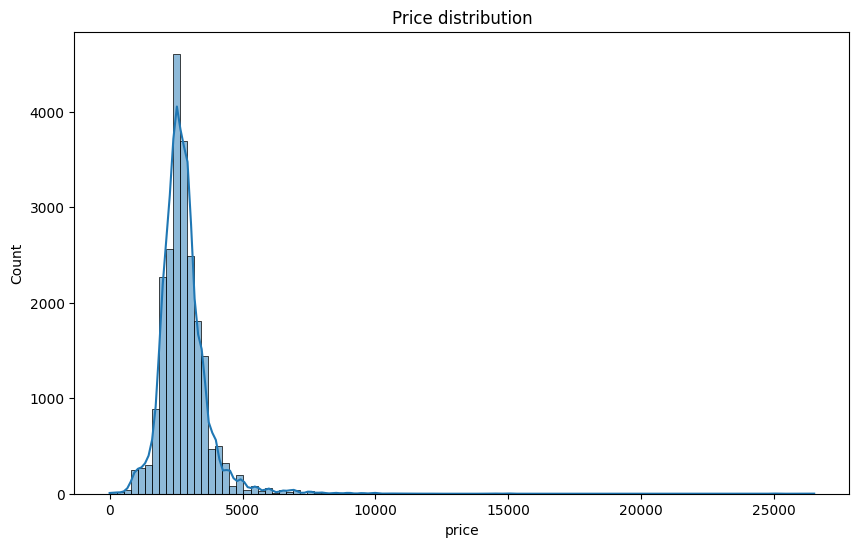

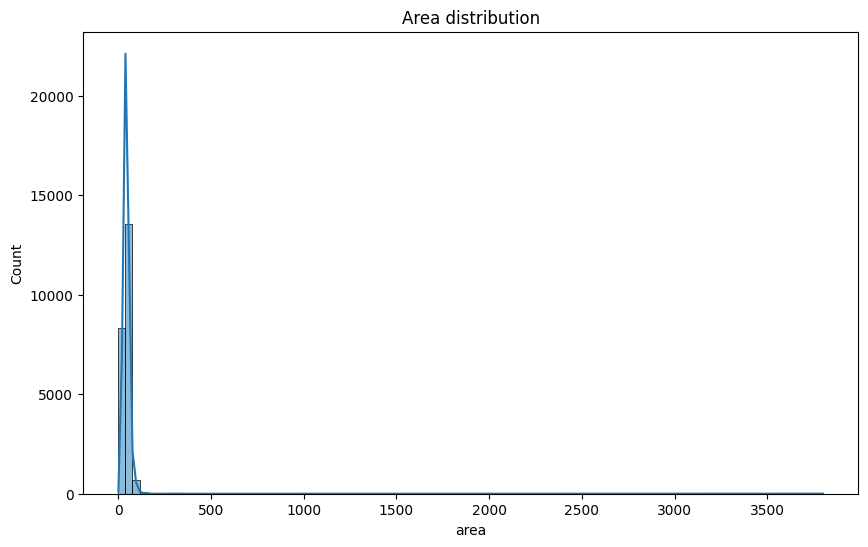

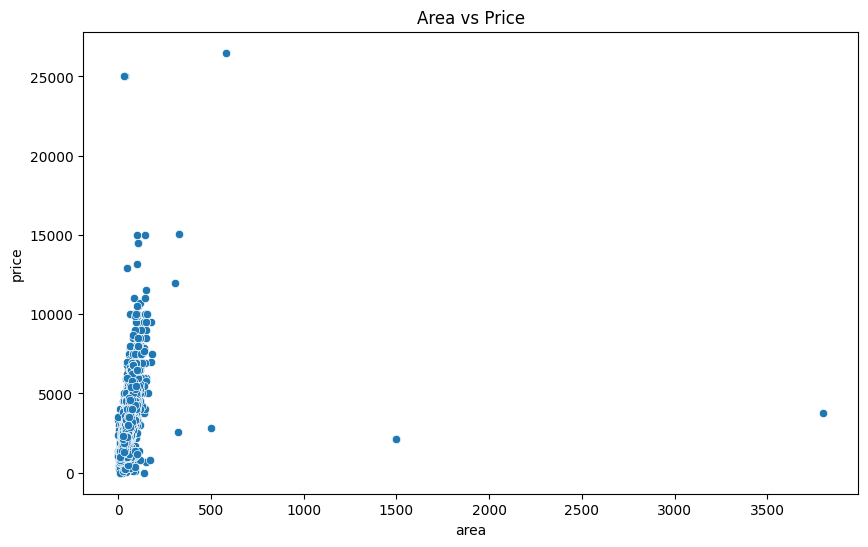

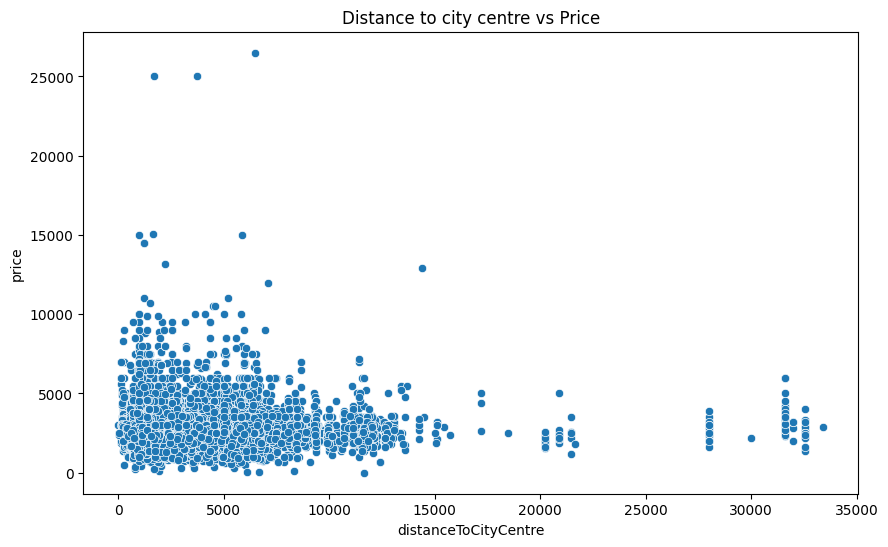

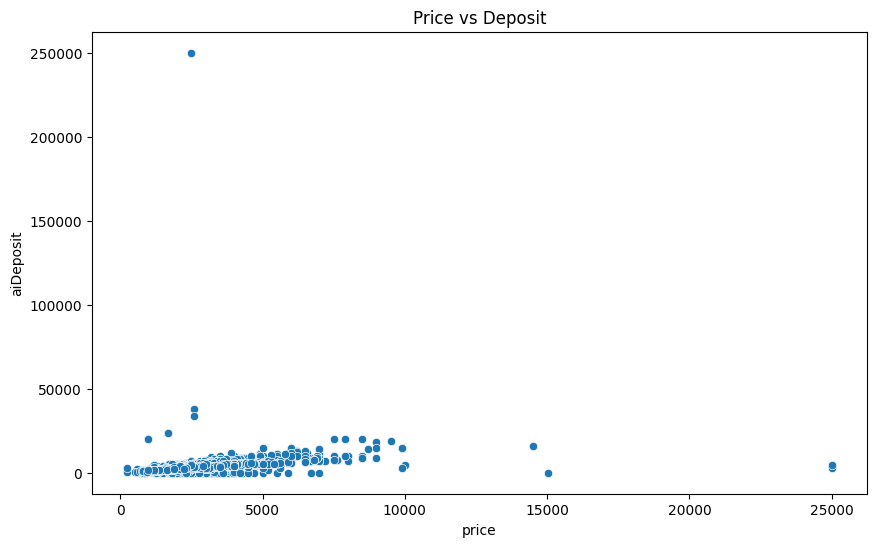

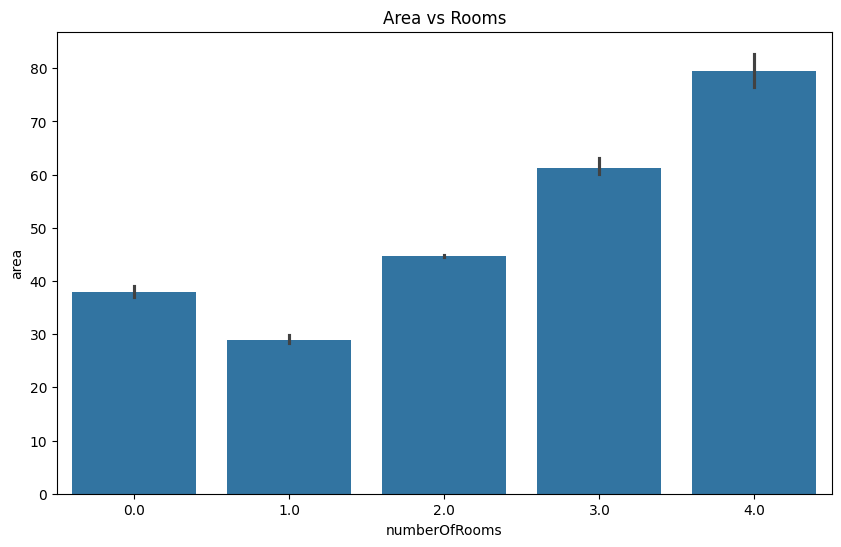

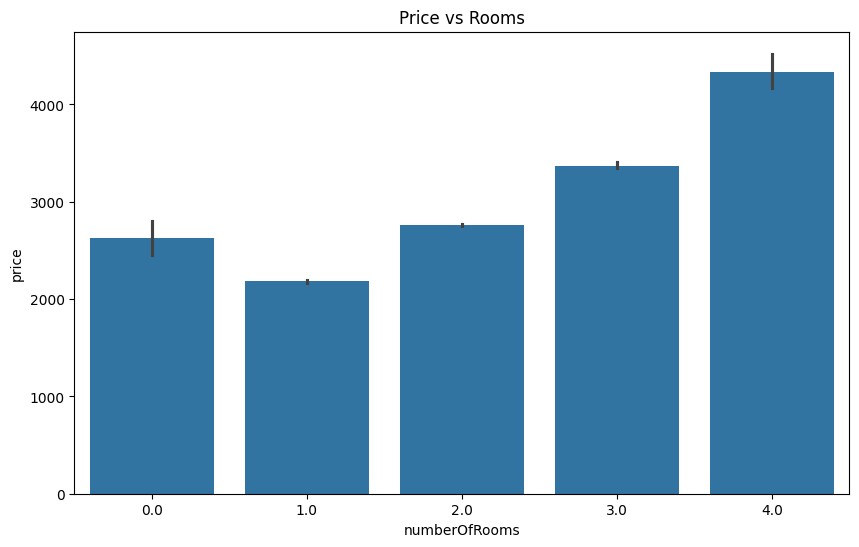

In [4]:
plt.figure(figsize=(10, 6))

# price distribution

sns.histplot(dataset["price"], bins=100, kde=True) # type: ignore
plt.title("Price distribution")
plt.show()

# area distribution

plt.figure(figsize=(10, 6))
sns.histplot(dataset["area"], bins=100, kde=True) # type: ignore
plt.title("Area distribution")
plt.show()

# area and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=dataset)
plt.title("Area vs Price")
plt.show()

# distance to city centre and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x="distanceToCityCentre", y="price", data=dataset)
plt.title("Distance to city centre vs Price")
plt.show()

# desposit and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="aiDeposit", data=dataset)
plt.title("Price vs Deposit")
plt.show()

# number of rooms and area

plt.figure(figsize=(10, 6))
sns.barplot(x="numberOfRooms", y="area", data=dataset)
plt.title("Area vs Rooms")
plt.show()

# number of rooms and price

plt.figure(figsize=(10, 6))
sns.barplot(x="numberOfRooms", y="price", data=dataset)
plt.title("Price vs Rooms")
plt.show()

# Cleaning the data
As we can see on plots, there are some outliers in the data:
- really big price (deposit and rent)
- number of rooms equal zero
- distance to city center larger than 10 km
- area larger than 200 m^2

We will remove them to get better results.

In [5]:
from src.filter_data import clean_data


filtered = clean_data(dataset)

# Data visualization

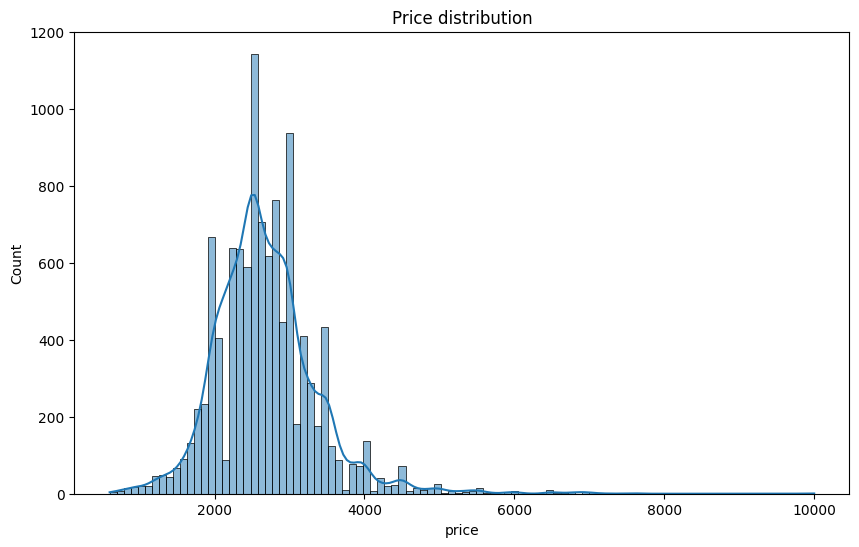

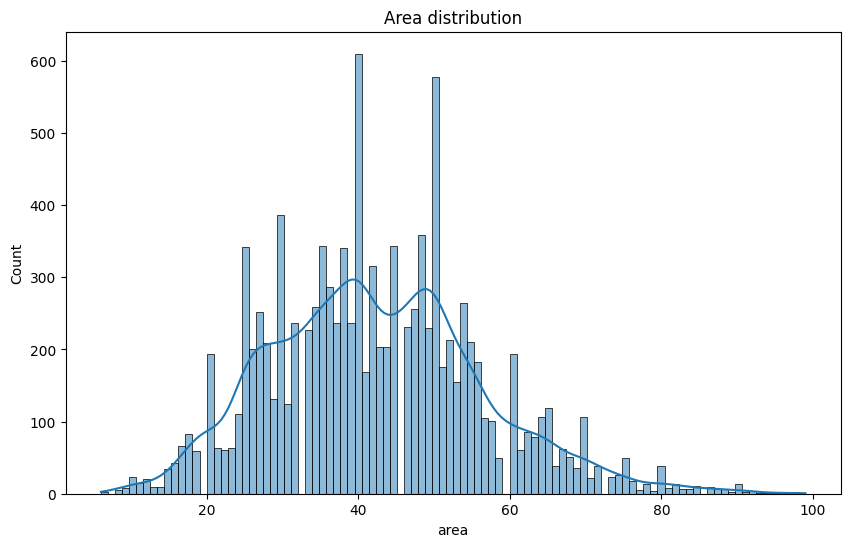

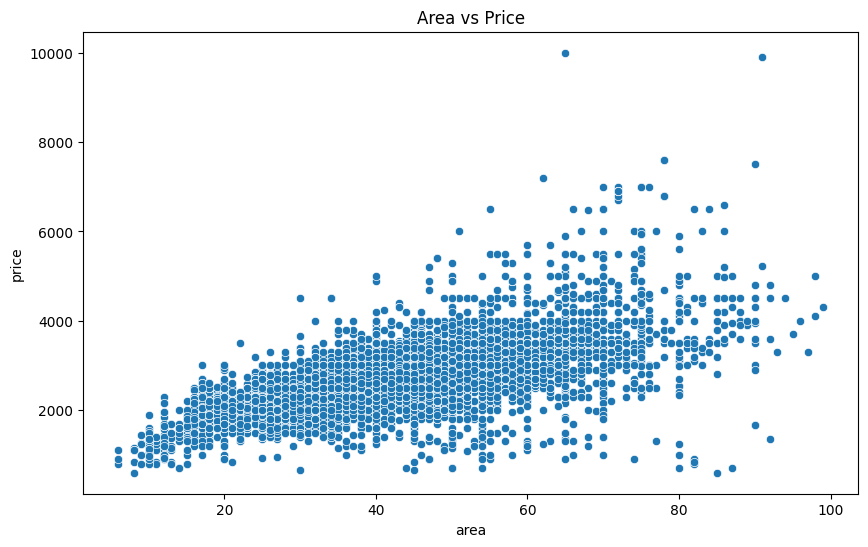

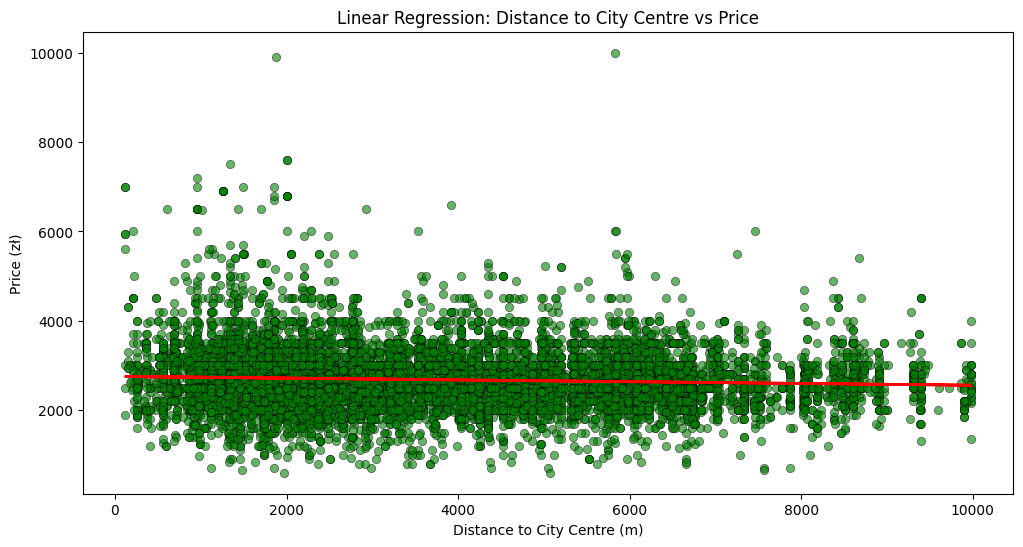

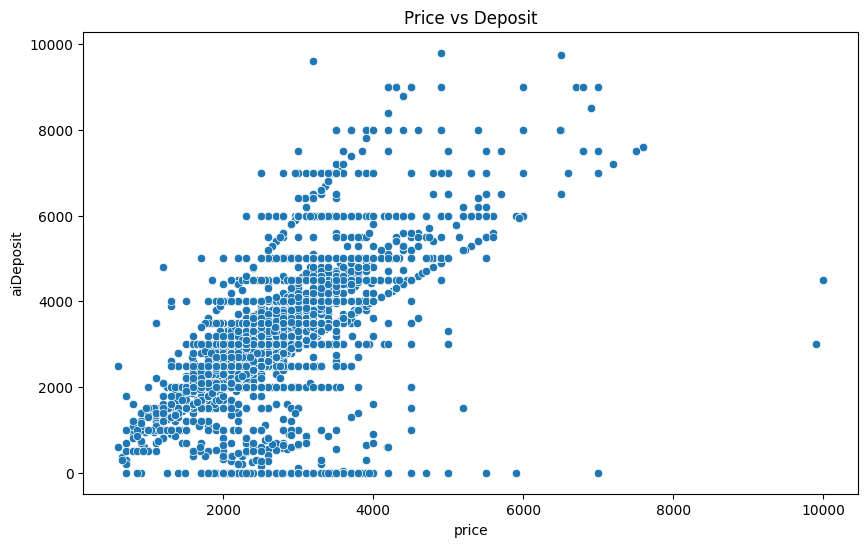

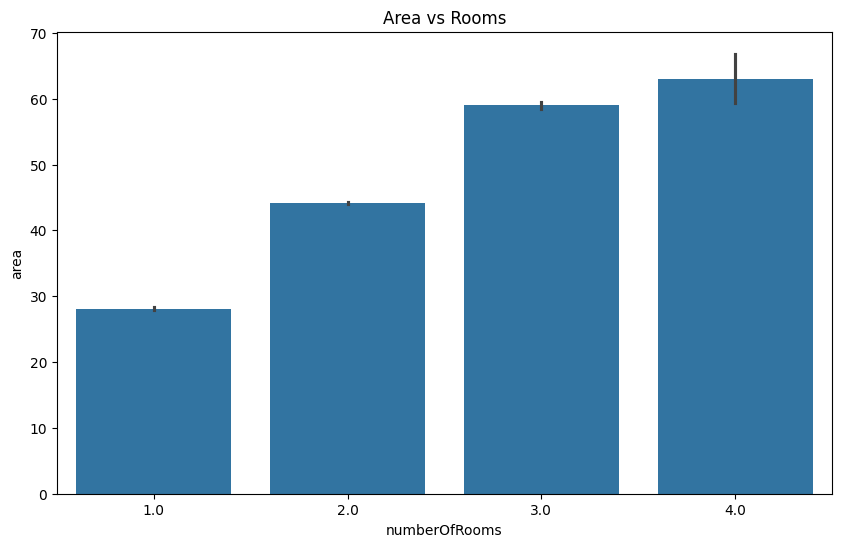

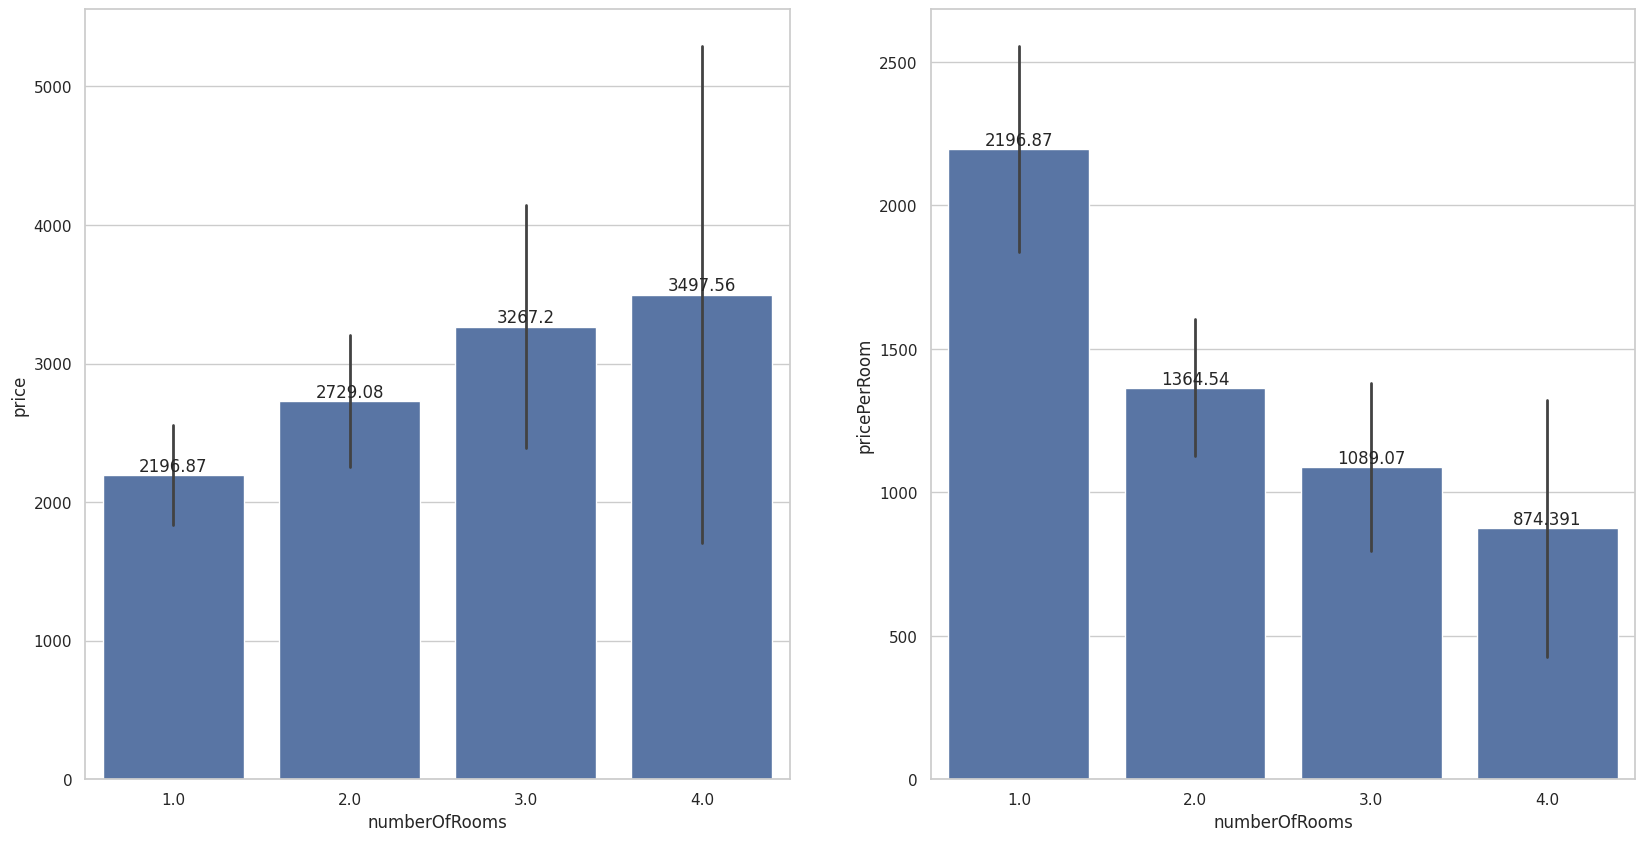

In [6]:
from sklearn.linear_model import LinearRegression


plt.figure(figsize=(10, 6))

# price distribution

sns.histplot(filtered["price"], bins=100, kde=True) # type: ignore
plt.title("Price distribution")
plt.show()

# area distribution

plt.figure(figsize=(10, 6))
sns.histplot(filtered["area"], bins=100, kde=True) # type: ignore
plt.title("Area distribution")
plt.show()

# area and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=filtered)
plt.title("Area vs Price")
plt.show()

# distance to city centre and price

regression_distance = LinearRegression().fit(filtered[['distanceToCityCentre']], filtered['price'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='distanceToCityCentre', y='price', data=filtered, color='green', edgecolor='black', alpha=0.6)
plt.plot(filtered['distanceToCityCentre'], regression_distance.predict(filtered[['distanceToCityCentre']]), color='red', linewidth=2)
plt.title('Linear Regression: Distance to City Centre vs Price')
plt.xlabel('Distance to City Centre (m)')
plt.ylabel('Price (zł)')
plt.show()

# desposit and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="aiDeposit", data=filtered)
plt.title("Price vs Deposit")
plt.show()

# number of rooms and area

plt.figure(figsize=(10, 6))
sns.barplot(x="numberOfRooms", y="area", data=filtered)
plt.title("Area vs Rooms")
plt.show()

# number of rooms and price, and price per room

plt.figure(figsize=(20, 10))

sns.set_theme(style="whitegrid")
plt.subplot(121)
ax = sns.barplot(x='numberOfRooms', y='price', data=filtered, errorbar="sd", err_kws={"linewidth": 2})
ax.bar_label(ax.containers[0]) # type: ignore

plt.subplot(122)
price_per_room = filtered.copy()
price_per_room['pricePerRoom'] = price_per_room['price'] / price_per_room['numberOfRooms']

ax = sns.barplot(x='numberOfRooms', y='pricePerRoom', data=price_per_room, errorbar="sd", err_kws={"linewidth": 2})
ax.bar_label(ax.containers[0]) # type: ignore

plt.show()


# Observation how price changes over time

Because we only have data from half of the year, we are not going to use it in our model, but it is interesting to see how price changes over time.

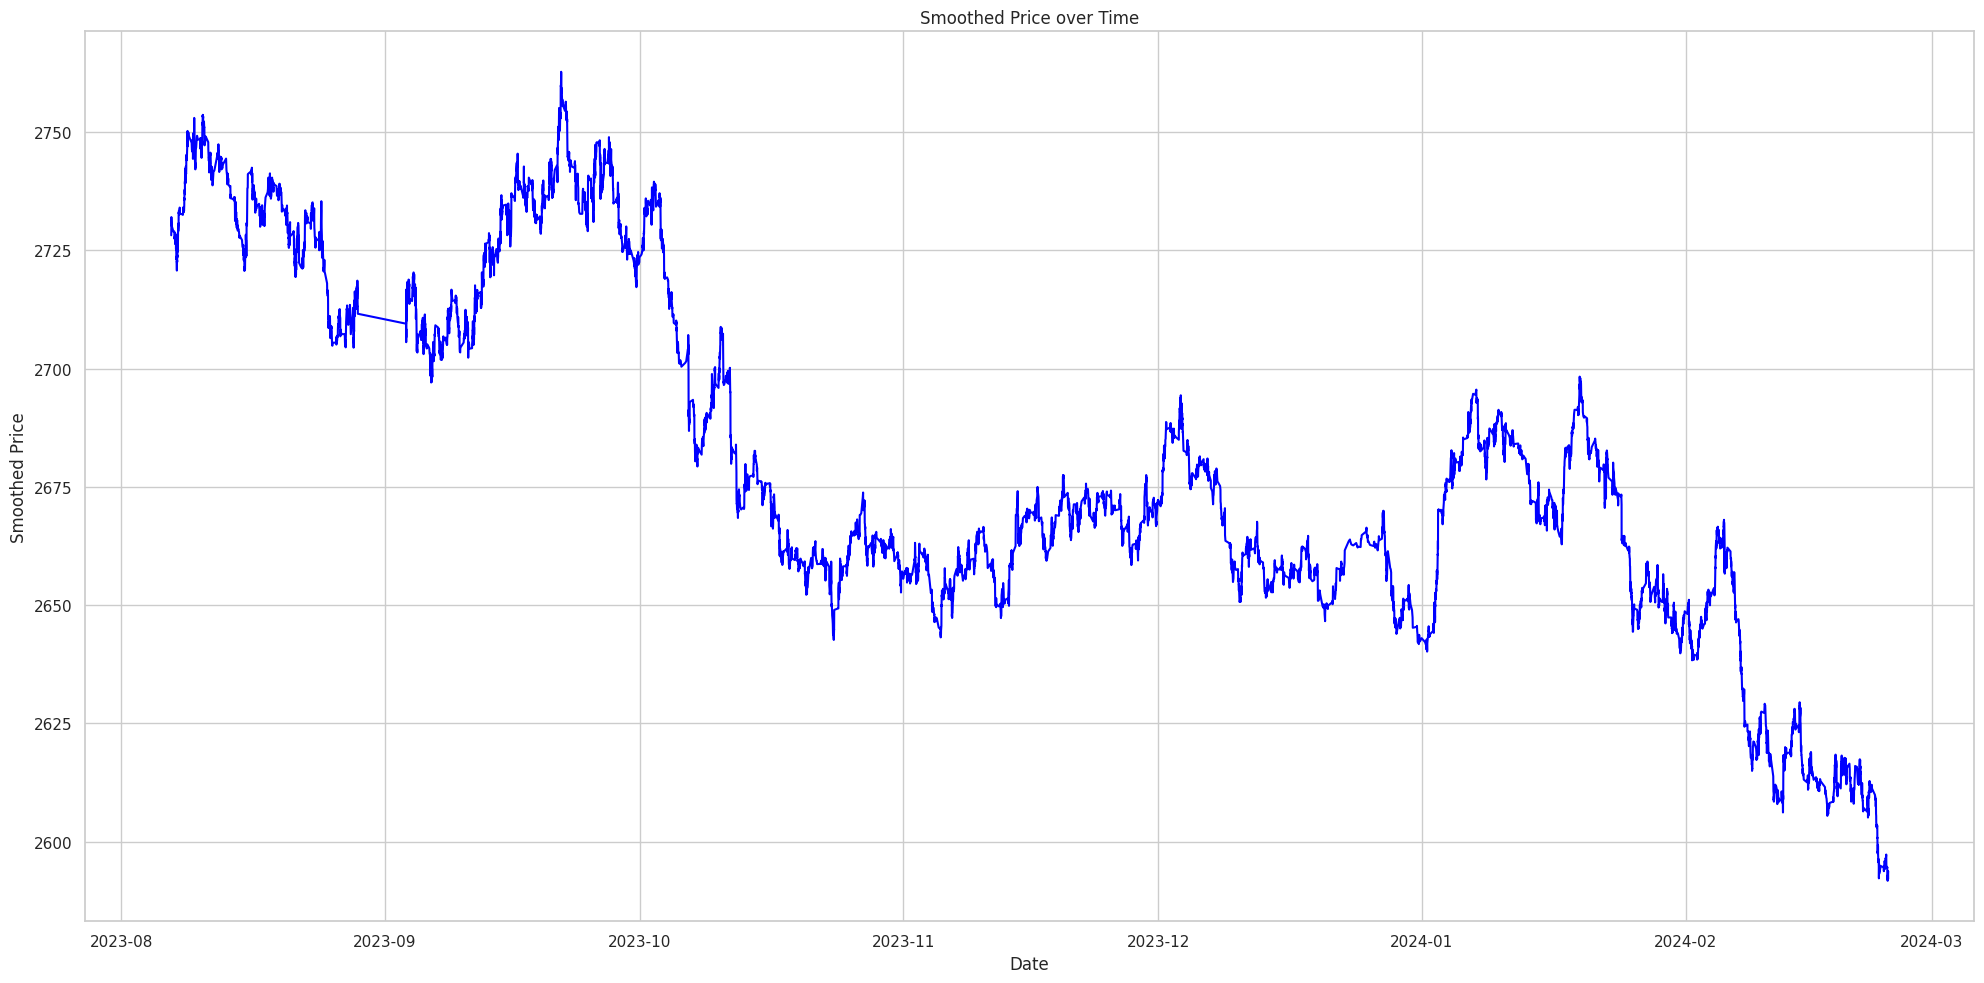

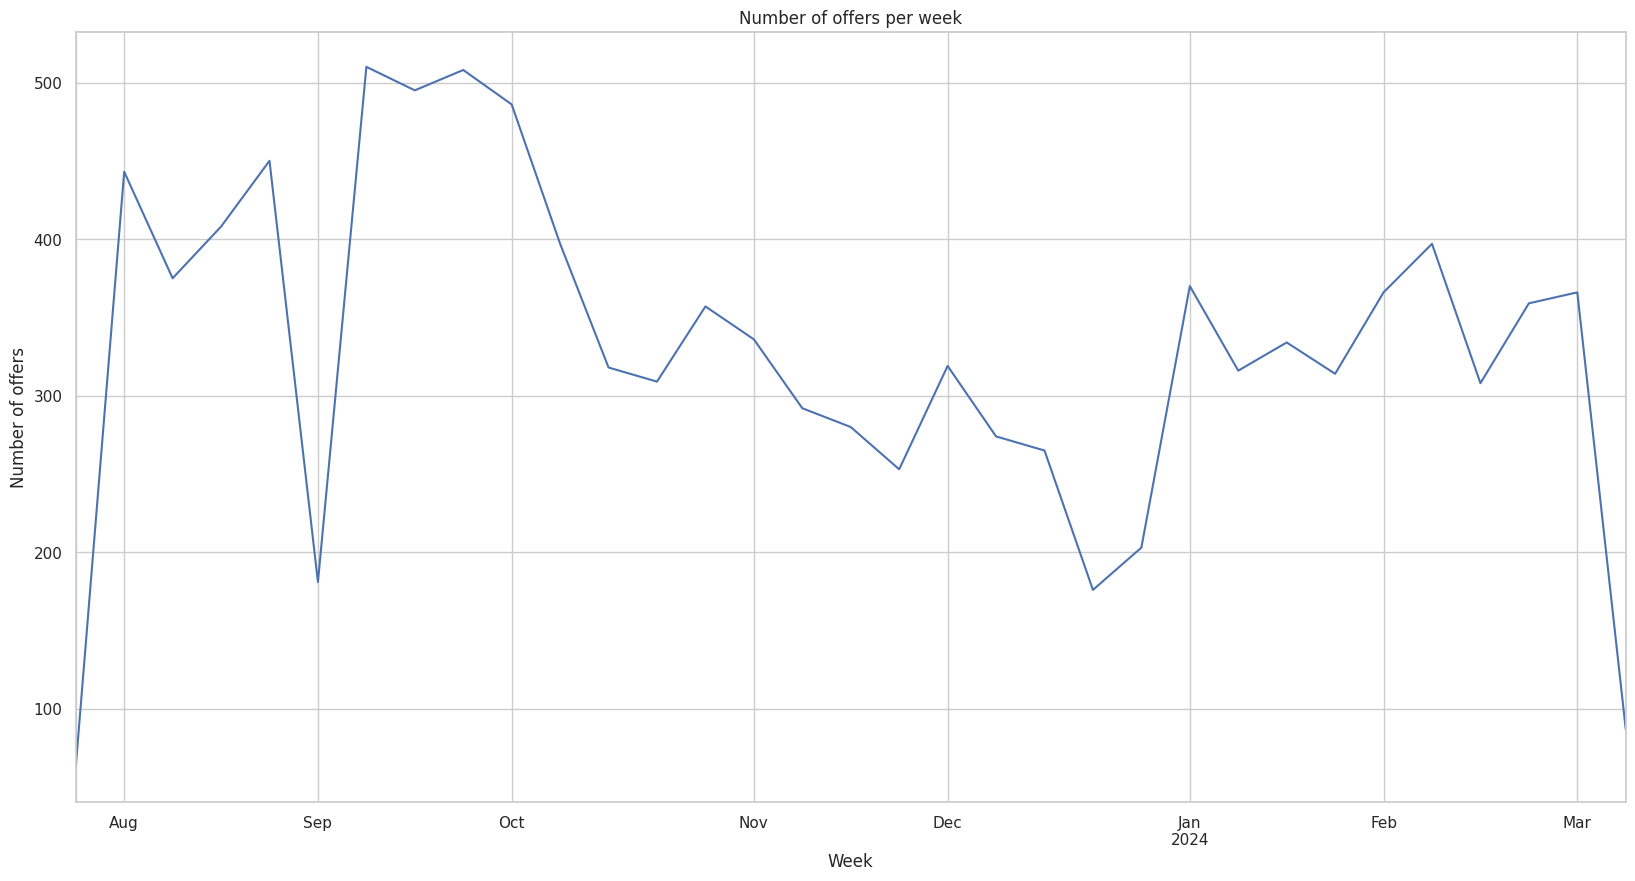

In [7]:
filtered['createdAt'] = pd.to_datetime(filtered['createdAt'])

filtered.sort_values('createdAt', inplace=True)


rolling_window = 1000  
filtered['smoothed_price'] = filtered['price'].rolling(window=rolling_window, center=True).mean()


plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='createdAt', y='smoothed_price', data=filtered, color='blue')

ax.set_title('Smoothed Price over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Smoothed Price')

plt.grid(True)
plt.tight_layout()

plt.show()

plt.figure(figsize=(20, 10))
filtered.resample('W', on='createdAt').size().plot()
plt.title('Number of offers per week')
plt.ylabel('Number of offers')
plt.xlabel('Week')
plt.show()

# Analysis of influence of number of rooms on price

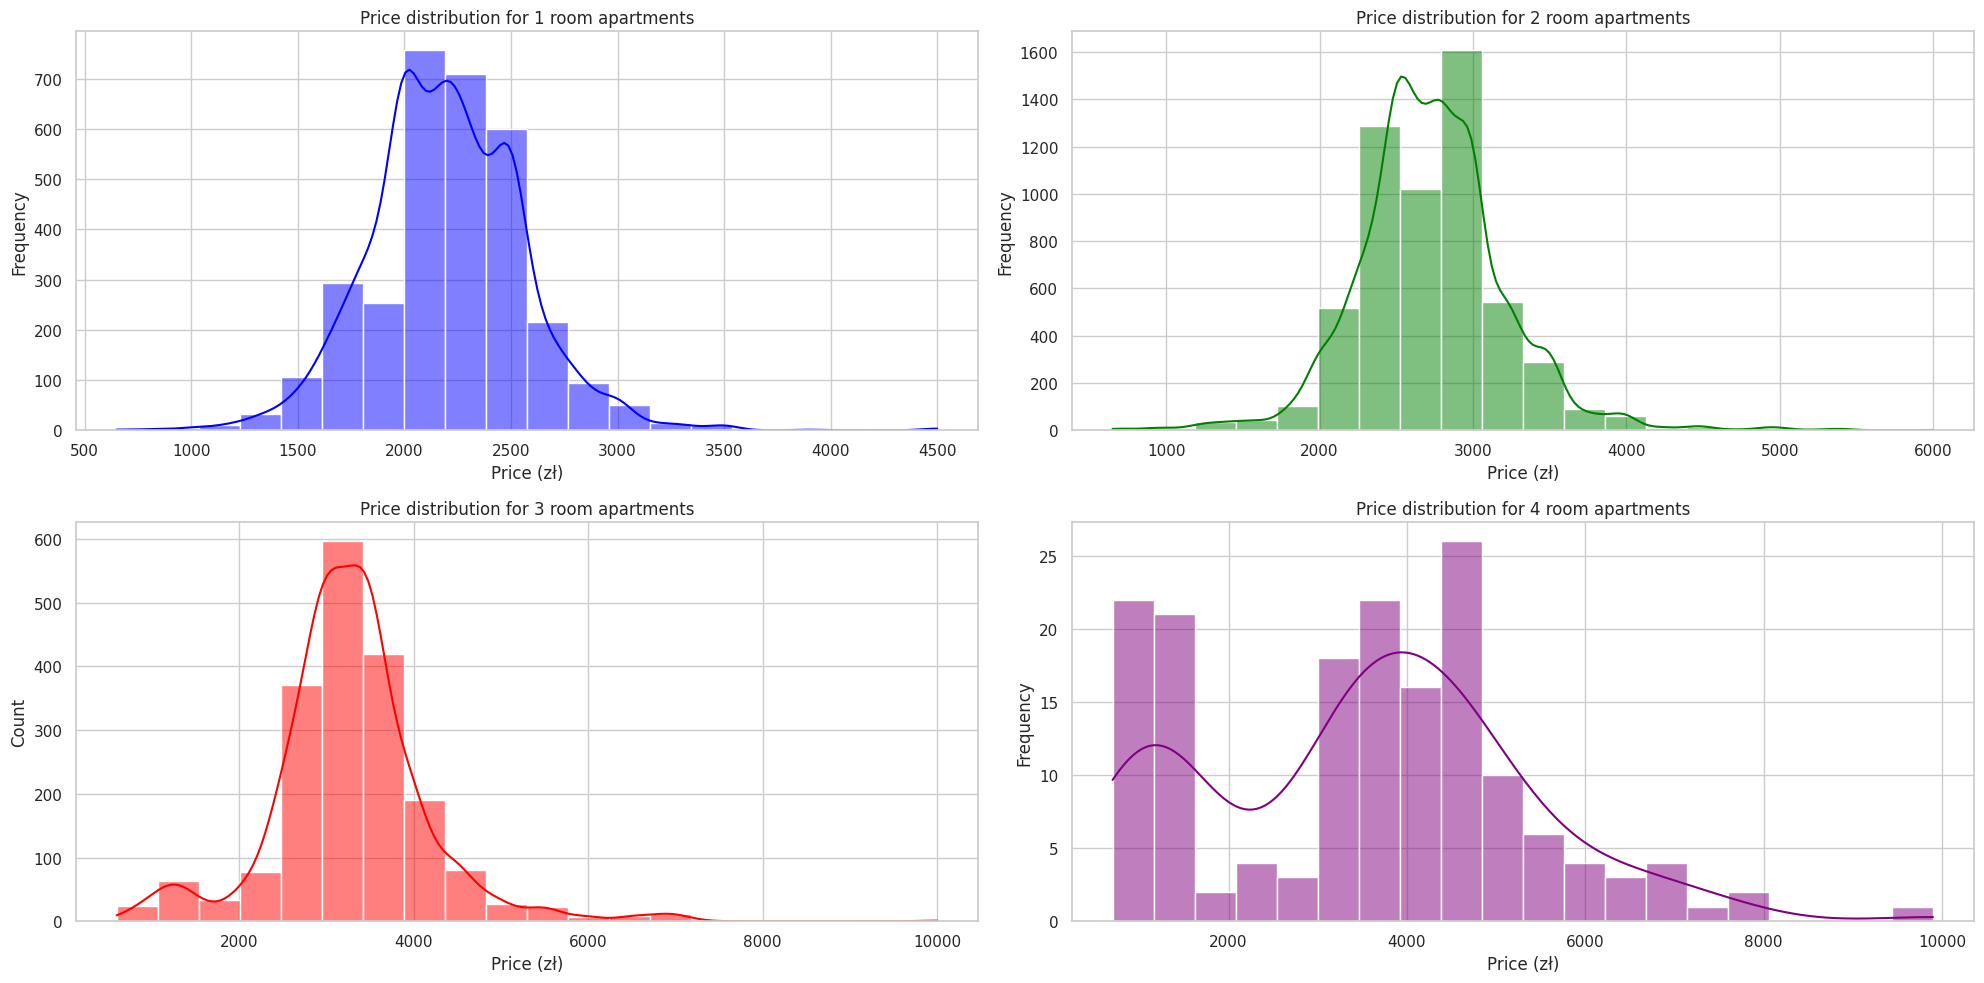

In [15]:

plt.figure(figsize=(20, 10))

number_of_bins = 20
plt.subplot(2, 2, 1)
sns.histplot(filtered[filtered['numberOfRooms'] == 1]['price'], bins=number_of_bins, color='blue', kde=True) # type: ignore
plt.title('Price distribution for 1 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(filtered[filtered['numberOfRooms'] == 2]['price'], bins=number_of_bins, color='green', kde=True) # type: ignore
plt.title('Price distribution for 2 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(filtered[filtered['numberOfRooms'] == 3]['price'], bins=number_of_bins,  color='red', kde=True) # type: ignore
plt.title('Price distribution for 3 room apartments')
plt.xlabel('Price (zł)')

plt.subplot(2, 2, 4)
sns.histplot(filtered[filtered['numberOfRooms'] == 4]['price'], bins=number_of_bins,  color='purple', kde=True) # type: ignore
plt.title('Price distribution for 4 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Because there isn't a lot of data for 4+ rooms apartments, the results seem pretty random. The rest are really similar to distribution of all prices, but offseted.

# Conclusions

- There is no correlation between distance from city center and price, which is surprising
- There is high correlation between area and price, which is expected
- There is high correlation deposit and price, which is expected, because deposit is usually 1 month rent
- More rooms means larger area and also larger price
- It's more worth to rent apartment with more rooms, because price per room is lower
- Price is distributed as right-skewed normal distribution, the most popular price is 2000 PLN and 3000 PLN
- Area is distributed as right-skewed normal distribution, but with more concentration on certain values

Because of the lack of correlation between distance from city center and price, we can assume that the price is not dependent on the location of the apartment.

# Next steps

We can try to build a model to predict the price of the apartment, to do that we can use linear regression, because:
- we have continuous dependent variable
- we have independent variables that are correlated with the dependent variable
- price is distributed as right-skewed normal distribution, which isn't as good as normal distribution, but still acceptable

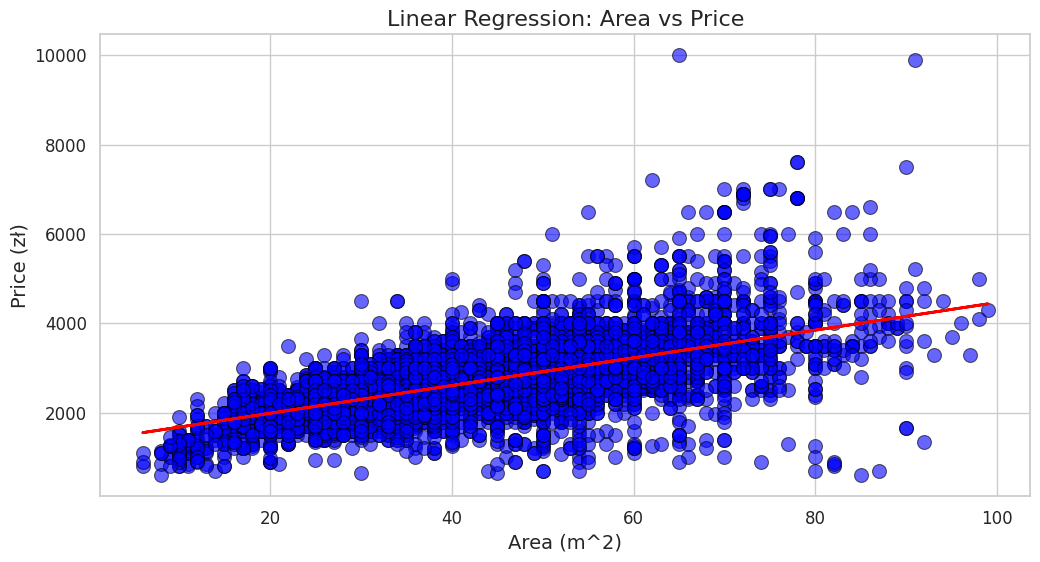

In [9]:
from sklearn.linear_model import LinearRegression


sns.set_style("whitegrid")

regression_area = LinearRegression().fit(filtered[['area']].values, filtered['price'].values) # type: ignore

plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', data=filtered, color='blue', s=100, edgecolor='black', alpha=0.6)
plt.plot(filtered['area'], regression_area.predict(filtered[['area']].values), color='red', linewidth=2)
plt.title('Linear Regression: Area vs Price', fontsize=16)
plt.xlabel('Area (m^2)', fontsize=14)
plt.ylabel('Price (zł)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



# Test of a model

In [10]:
meters = 62
print(f"Price = {regression_area.intercept_} + {regression_area.coef_[0]} * Area")
price = regression_area.predict(np.array([[meters]]))[0]

print(f"Predicted price for {meters} m^2: {price:.2f} zł")



Price = 1366.825647292178 + 31.004356594755563 * Area
Predicted price for 62 m^2: 3289.10 zł


## Classification

To classify the offer as occassional, we can use our model to predict the price and then compare it with the actual price. If the difference is larger than margin, we can classify the offer as occassional.

To know the margin, this is the plot of the best 10% of the offers vs the rest of the offers.

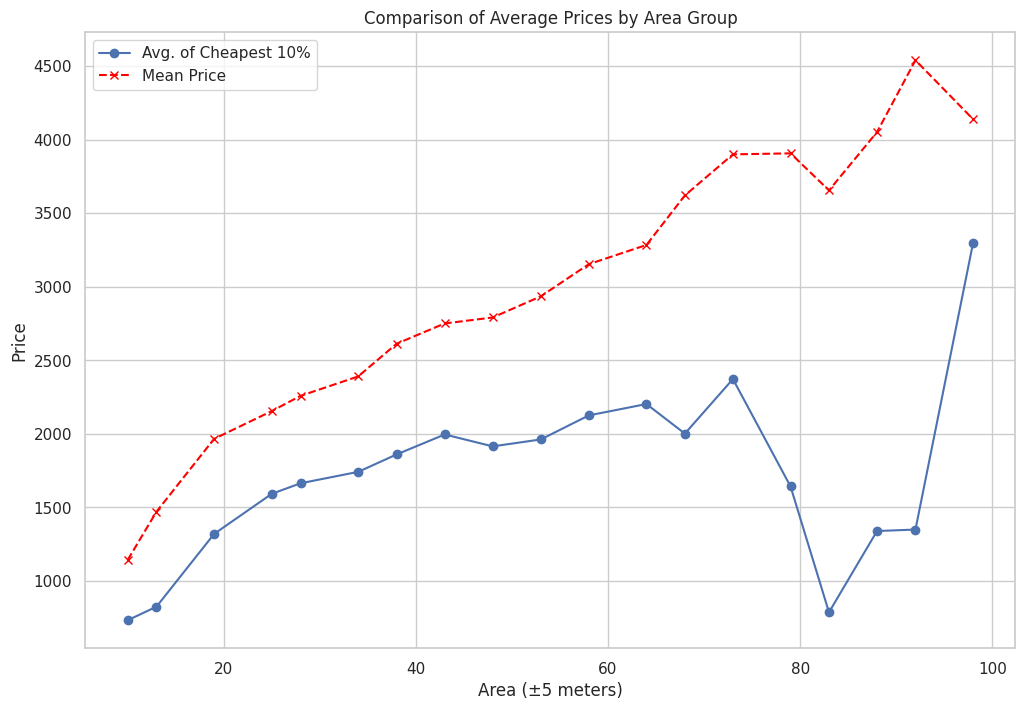

In [11]:

df = filtered.sort_values(by='area')

def assign_group(x):
    base = x.min()
    groups = (x - base) // 5
    return groups

df['group'] = assign_group(df['area'])

def average_of_cheapest_10_percent(group):
    n = max(1, int(len(group) * 0.1))  # Ensure at least one apartment is considered
    cheapest = group.nsmallest(n, 'price')
    return cheapest['price'].mean()


average_prices = df.groupby('group').apply(average_of_cheapest_10_percent, include_groups=False)

mean_prices = df.groupby('group')['price'].mean()

median_areas = df.groupby('group')['area'].median()

plot_data = pd.DataFrame({
    'Average of Cheapest 10%': average_prices,
    'Mean Price': mean_prices,
    'Median Area': median_areas
})

plot_data.sort_values(by='Median Area', inplace=True)


plt.figure(figsize=(12, 8))
plt.plot(plot_data['Median Area'], plot_data['Average of Cheapest 10%'], marker='o', linestyle='-', label='Avg. of Cheapest 10%')
plt.plot(plot_data['Median Area'], plot_data['Mean Price'], marker='x', linestyle='--', color='red', label='Mean Price')
plt.title('Comparison of Average Prices by Area Group')
plt.xlabel('Area (±5 meters)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the difference is from 500 to over 1000 PLN, so we can test margins in this range.

When the area is larger, there is less data so the margin is becoming less predictable, we won't worry about that.

# Testing margins
Tested margins:
- 300
- 500
- 700
- 1000

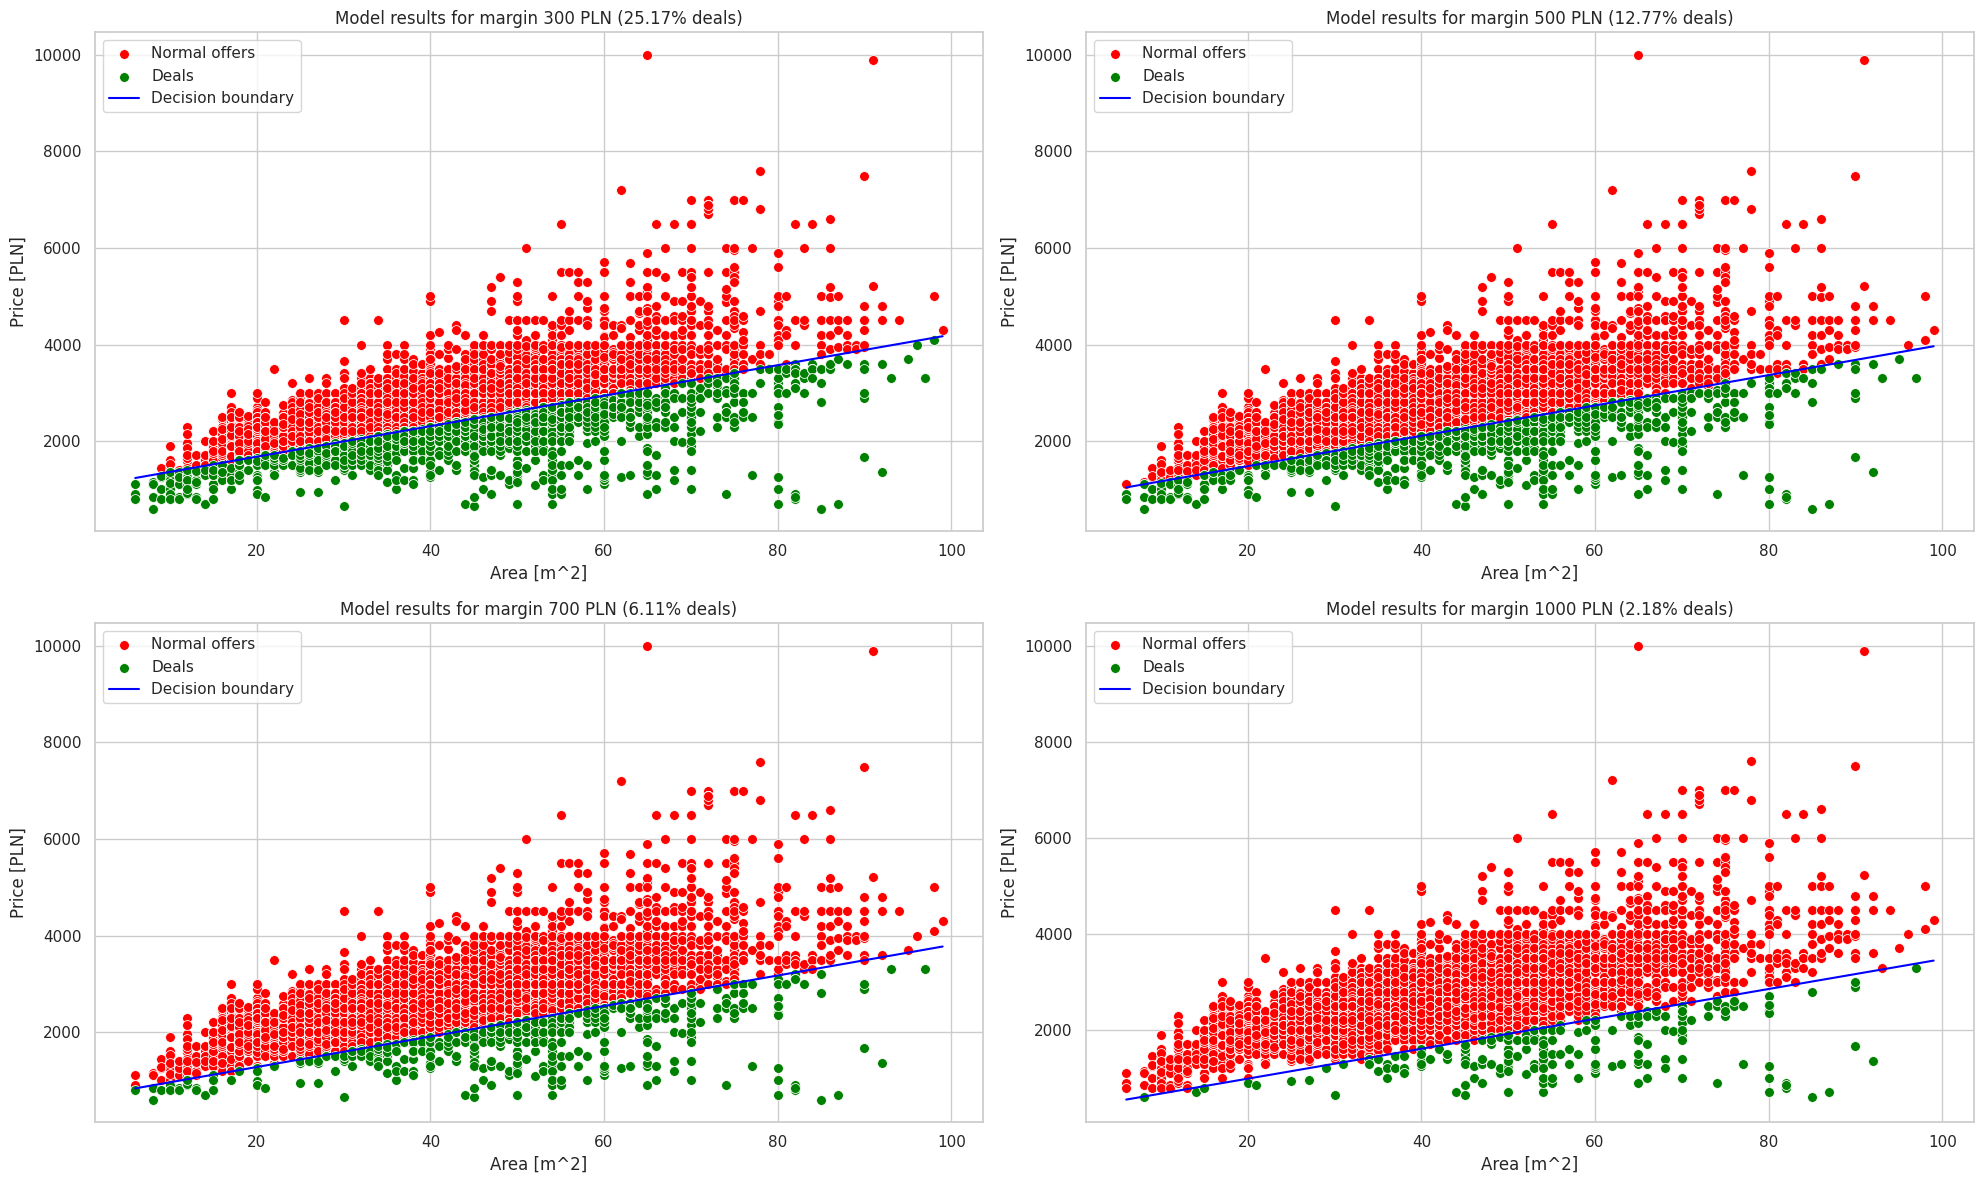

In [12]:
from sklearn.linear_model import LogisticRegression
from src import model


margins = [300, 500, 700, 1000]
plt.figure(figsize=(20, 12))

for i, margin in enumerate(margins, start=1):
    good_deals = df.apply(
        lambda row: model.is_occasional_rental(
            row["price"], row["area"], margin=margin
        ),
        axis=1,
    )

    good_deals_df = df[good_deals]
    not_good_deals_df = df[~good_deals]

    percentage_good_deals = 100 * good_deals.mean()

    X = df[["area", "price"]]
    y = good_deals.astype(int)
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    plt.subplot(2, 2, i) 
    sns.scatterplot(
        x="area",
        y="price",
        data=not_good_deals_df,
        color="red",
        label="Normal offers",
        s=50,
    )
    sns.scatterplot(
        x="area", y="price", data=good_deals_df, color="green", label="Deals", s=50
    )

    x_values = np.linspace(df["area"].min(), df["area"].max(), 300)
    y_values = (
        -(log_reg.coef_[0][0] * x_values + log_reg.intercept_[0])
        / log_reg.coef_[0][1]
    )
    plt.plot(x_values, y_values, color="blue", label="Decision boundary")

    plt.xlabel("Area [m^2]")
    plt.ylabel("Price [PLN]")
    plt.title(
        f"Model results for margin {margin} PLN ({percentage_good_deals:.2f}% deals)"
    )
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

As we can see on the plot, optimal margin is 500 PLN, because in can capture best offers in the wide range of areas.

Why not the others:
- 300 - too many occassional offers
- 700 - it is too strict, we are missing a lot of good offers in lower areas
- 1000 - it is really strict, there are no good offers in lower areas

# Playground

You can play with the model by changing the value of margin and assessing the results.

In [13]:
from src.model import is_occasional_rental
from IPython.display import HTML

occasions = filtered.apply(lambda x: is_occasional_rental(x["price"], x["area"]), axis=1)

number_of_occasional_rentals = occasions.sum()

print(f"Number of occasional rentals: {number_of_occasional_rentals}")
print(f"Percentage of occasional rentals: {number_of_occasional_rentals / len(occasions) * 100:.2f}%")

display(df[occasions].sample(5)[['title', 'price', 'area', 'numberOfRooms', 'distanceToCityCentre']])

print()
random_occasional_rental = filtered[occasions].sample(1)
print("Random apartment that is an occasional rental: ")
print(f"Title: {random_occasional_rental['title'].values[0]}")
print(f"Price: {int(random_occasional_rental['price'].values[0])} zł")
print(f"Predicted price: {int(regression_area.predict(random_occasional_rental[['area']].values)[0])} zł")
print(f"Area: {int(random_occasional_rental['area'].values[0])} m^2")
print(f"Number of rooms: {int(random_occasional_rental['numberOfRooms'].values[0])}")
print(f"Distance to city centre: { round(random_occasional_rental['distanceToCityCentre'].values[0], -2)} m")
display("Description:")

display(HTML(random_occasional_rental['description'].values[0]))  # noqa: F821




Number of occasional rentals: 1394
Percentage of occasional rentals: 12.77%


/tmp/ipykernel_181871/2283853164.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df[occasions].sample(5)[['title', 'price', 'area', 'numberOfRooms', 'distanceToCityCentre']])


,title,price,area,numberOfRooms,distanceToCityCentre
9110,Dwupokojowe 38 m2 ul. Olesnicka 14,1600.0,38.0,2.0,1461.482421
15957,Zatorska -2-pokojowe z balkonem.,2100.0,48.0,2.0,8600.847865
18408,Strachocin * 2 pokoje * osobna kuchnia * balkon,2100.0,45.0,2.0,2186.267336
16296,Wynajmę mieszkanie we Wrocławiu na Kozanowie o...,2600.0,64.0,3.0,5418.207911
8176,2 pokojowe m. z Balkonem przy ul. Powstańców Śl.,2300.0,52.0,2.0,2201.532591



Random apartment that is an occasional rental: 
Title: 2 pokoje/osobna kuchnia/ ul. Wyszyńskiego/blisko centrum
Price: 2400 zł
Predicted price: 2948 zł
Area: 51 m^2
Number of rooms: 2
Distance to city centre: 1700.0 m


'Description:'